In [1]:
import os
import random
import h5py
import math
import matplotlib.pyplot as plt
import jax
import jax.numpy as np
import fenton_karma as fk

## SEPARATE DIFFUSION AND REACTION TERM

In [2]:
# simulation inputs (real values)
root = "/media/ep119/DATADRIVE3/epignatelli/deepexcite/"
field_size = (12, 12)  # cm
d = 0.001  # (cm^2/ms)
cell_parameters = fk.params.params3()

# infinitesimals
dx = 0.01  # (cm/units) - Fenton 1998 recommends ~200, 300 micron/gridunit (~0.02, 0.03), smaller dx means finer grid
dt = 0.01  # (ms) - Fenton 1998 recommends few hundreds of ms (~0.01, 0.04)

# diffusivity 
d = 0.001  # cm^2/ms
shape = fk.convert.realsize_to_shape(field_size, dx)
diffusivity = np.ones(shape) * d

In [3]:
name = root + "train_dev_set/deepreact_spiral_params5.hdf5"

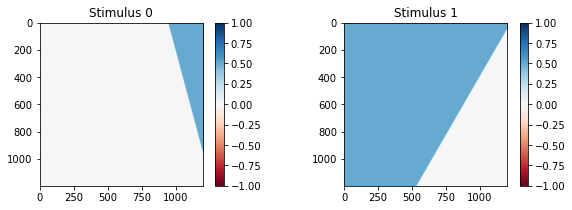

In [4]:
# times
start = 0  # ms
stop = 2000  # ms
show_every = 1  # ms

# stimuli
s1 = fk.stimulus.protocol(start=0, duration=2)
s1 = fk.stimulus.triangular(shape, direction="right", angle=15, coverage=0.1, modulus=0.5, protocol=s1)

s2 = fk.stimulus.protocol(start=fk.convert.ms_to_units(400, dt), duration=2)
s2 = fk.stimulus.triangular(shape, direction="up", angle=60, coverage=0.7, modulus=0.5, protocol=s2)

# s3 = fk.stimulus.protocol(start=fk.convert.ms_to_units(900, dt), duration=2)
# s3 = fk.stimulus.triangular(shape, direction="down", angle=30, coverage=0.7, modulus=1., protocol=s3)

stimuli = [s1, s2]
fk.plot.show_stimuli(*stimuli)

In [5]:
state = fk.model.init(shape)

In [6]:
state = fk.model.step(state, 10, cell_parameters, diffusivity, stimuli, dt, dx)

In [ ]:
checkpoints = np.arange(start // dt, (stop - start) // dt, show_every // dt)
states = fk.model.forward(shape, checkpoints, cell_parameters, diffusivity, stimuli, dt, dx)

In [ ]:
fk.data.generate(start=fk.convert.ms_to_units(start, dt),
                 stop=fk.convert.ms_to_units(stop, dt),
                 dt=dt, dx=dx,
                 cell_parameters=cell_parameters,
                 diffusivity=diffusivity,
                 stimuli=stimuli,
                 filename=name)

In [ ]:
# display
with h5py.File(name, "r") as file:
    states = file["states"][::show_every]
    print(file["states"].shape)
    print(states.shape)    

V = fk.convert.u_to_V(states[:, 2])
fig, ax = fk.plot.show_grid(V, figsize=(25, 25), font_size=18)